# Model Building and HyperParameter Tuning

## Model Selection :

###  This DataSet is Highly Unbalanced thus, I will use 'A Dummy Classifiers' as a baseline for Performance and Evaluation namely:

1. Dummy Classifier (Stratergy = 'Most_Frequent')
2. Dummy Classifier (Stratergy = 'Unifrom')

###  For The Final Model Building as the Data is very Sparse and Feature Don't Relate with each other that much, I will Fit and Compare 4 Different Models namely:

1. KNN Classifier
2. Logistic Regression
3. Decision Tree

## Evaluation Metric :

This DataSet is highly unbalanced i.e there are a total of 145734 Instances of The Negative Class and only 11265 Instances of The Positive Class, Hence Accuracy will not be a good Metric for Evaluation.

### A Binary Confusion Matrix:

<img src="_Images/Confusion_matrix.png" width="600">

## Other Considered Metrics (Based on Confusion Matrix) for Evaluation :

### 1. Recall ( The True Positive Rate ):
 
# <img src="https://render.githubusercontent.com/render/math?math=Recall=\frac{TP}{TP%2BFN}=TPR">

- The True Positive divided by the sum of the False Negative and the True Positives.
- TPR describes the proportion of the actual postive samples that were correctly classified as positive, thus we want this value to approach 1.

### 2. Specificity ( The False Positive Rate ):
 
# <img src="https://render.githubusercontent.com/render/math?math=FNR=\frac{FP}{FP%2BTN}=Specificity">

- The False positives divided by the sum of the False Positive and the True Negatives.
- FNR describes the error of the Positive cases, thus we want this value to approach 0.

### 3. Receiver Operating Characteristics (ROC) is defined as:

- A comparison of the True Positive Rate and the False Positive Rate.

# <img src="https://render.githubusercontent.com/render/math?math=ROC=\frac{TPR}{FPR}=\frac{\frac{TP}{TP%2BFN}}{\frac{FP}{FP%2BTN}}">

- The goal is to have a ROC close to 1, as this suggests the model is getting a balanced split.
- The ROC can help guide where the best threshold split might be.

### 4. The Area Under the ROC Curve ( AUC ):
<ul>
<li>ie, the integral of the <span class="math inline">\(ROC(x)\epsilon D,s.t. D=0\le x\le 1\)</span></li>
</ul></li>
<br />
<img src="_Images/AUC.PNG" width="250">
 
<br />

- This provides and aggregated measure of preformance across all thresholds.
- A general idea as to the overall potential accuracy of a model.

## Conclusion:

### AUC of ROC Curve was Selecetd as the Evaluation Metric for this Project as:
- It Captures Both performance from both the criterias namely TPR and FPR and thus should give suffice insight to Evaluate the Models
- Using AUC we can alter the Prediction Threshold for our model to Tune it Precisely
- We, can easily visualize the Performance of the Models by simply plotting the ROC Curve

## Loading DataSets and Dependencies


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-colorblind')

train = pd.read_csv('Final_Train.csv',encoding='ISO-8859-1',low_memory=False,index_col=0)
train.index = train['ticket_id']
train.drop(['ticket_id'],axis=1,inplace=True)

X = train.drop(['compliance'],axis=1) # Independent Vairables
y = train['compliance']

# Splitting train and test Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # random_state for reproduction

# Creating Baseline Classifiers:
### 1. Dummy Classifier( Stratergy = 'Most_Frequent' )


Accuracy Gained by Dummy Classifier (most_frequent) 0.929



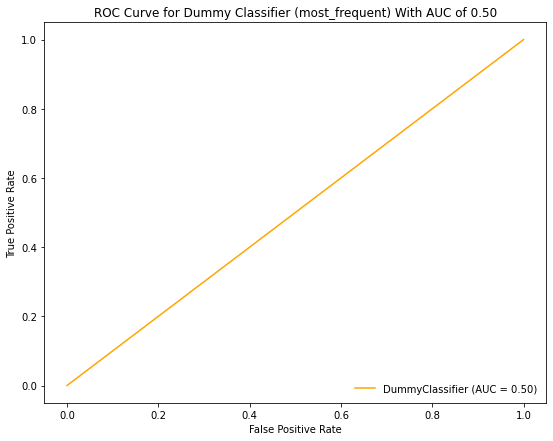

In [2]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_roc_curve,roc_auc_score
dum1 = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)

#Probability of test Set
y_score = dum1.predict_proba(X_test)

#Plotting ROC Curve
plt.figure(figsize=(9,7))
ax=plt.gca()
plot_roc_curve(dum1, X_test, y_test,ax=ax,color='orange');
plt.title('ROC Curve for Dummy Classifier (most_frequent) With AUC of {:.2f}'.format(roc_auc_score(y_test,y_score[:,1])));
plt.legend(frameon=False,loc=4)

#Getting Accuracy for comparision

print('\nAccuracy Gained by Dummy Classifier (most_frequent) {:.3f}\n'.format(dum1.score(X_test,y_test)))

In [3]:
#As you we can even a dummy calssifier gained a Accuracy of 93% Hence Accuracy is not a good Metric for our case 
#but it's AUC is only 0.5 hence we can use AUC to improve performance 

### 2. Dummy Classifier( Stratergy = 'Startified' )


Accuracy Gained by Dummy Classifier (Unifrom) 0.498



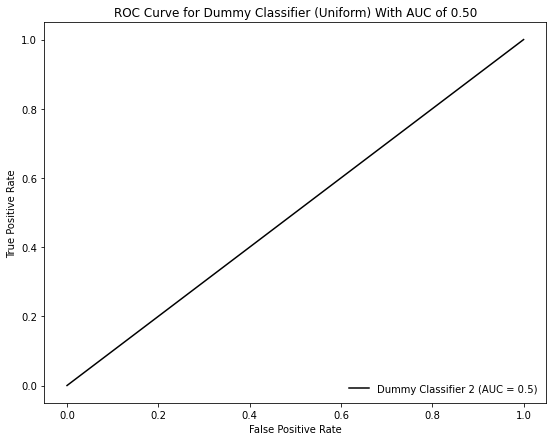

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_roc_curve,roc_auc_score
dum2 = DummyClassifier(strategy='uniform').fit(X_train,y_train)

#Probability of test Set
y_score = dum2.predict_proba(X_test)

#Plotting ROC Curve
plt.figure(figsize=(9,7))
ax=plt.gca()
plot_roc_curve(dum2, X_test, y_test,ax=ax,color='k',label='Dummy Classifier 2 (AUC = {})'
               .format(roc_auc_score(y_test,y_score[:,1])));
plt.title('ROC Curve for Dummy Classifier (Uniform) With AUC of {:.2f}'
          .format(roc_auc_score(y_test,y_score[:,1])));
plt.legend(frameon=False,loc=4)

#Getting Accuracy for comparision

print('\nAccuracy Gained by Dummy Classifier (Unifrom) {:.3f}\n'.format(dum2.score(X_test,y_test)))

In [5]:
#From The Dummy Classifiers The Baseline for Accuracy is 93% and AUC is 0.5

## Testing Different Models

### 1. KNN Classifier


Accuracy Gained by KNN Classifier on train set 0.937

Accuracy Gained by KNN Classifier on test set 0.927



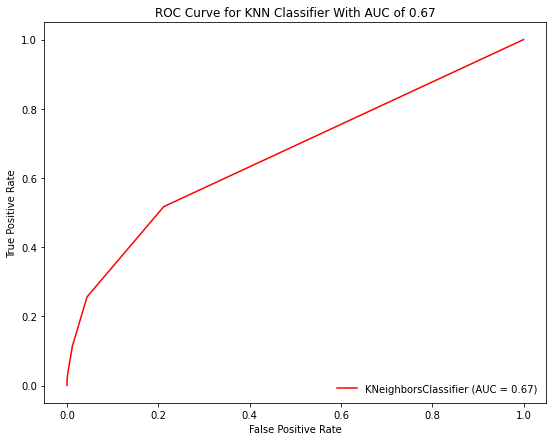

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='minkowski',p=2).fit(X_train,y_train) #Default parameters

#Probability of test Set
y_score = knn.predict_proba(X_test)

#Plotting ROC Curve
plt.figure(figsize=(9,7))
ax=plt.gca()
plot_roc_curve(knn, X_test, y_test,ax=ax,color='r');
plt.title('ROC Curve for KNN Classifier With AUC of {:.2f}'.format(roc_auc_score(y_test,y_score[:,1])));
plt.legend(frameon=False,loc=4)

#Getting Accuracy for comparision

print('\nAccuracy Gained by KNN Classifier on train set {:.3f}\n'.format(knn.score(X_train,y_train)))
print('Accuracy Gained by KNN Classifier on test set {:.3f}\n'.format(knn.score(X_test,y_test)))

In [7]:
#KNN has Improved the besline AUC even with the default parameter

### HyperParameter Tuning

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#Parameters
param = {'n_neighbors':(3,5,8,10),'weights':('uniform','distance')}

clf = GridSearchCV(knn, param,scoring='roc_auc',cv=3) #Grid Search with 3 fold Validation
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (3, 5, 8, 10),
                         'weights': ('uniform', 'distance')},
             scoring='roc_auc')

In [9]:
#Extracting Information From Grid Search Results

df = pd.DataFrame(data=clf.cv_results_)
df = df.iloc[:,4:].drop(['std_test_score'],axis=1).set_index('rank_test_score').sort_values('mean_test_score',ascending=False)
df

,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score
rank_test_score,,,,,,,
1,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.684660,0.691727,0.684570,0.686986
2,8,uniform,"{'n_neighbors': 8, 'weights': 'uniform'}",0.679899,0.683181,0.673534,0.678871
3,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.668484,0.674245,0.671220,0.671316
4,8,distance,"{'n_neighbors': 8, 'weights': 'distance'}",0.664016,0.667851,0.661911,0.664593
5,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.661322,0.663871,0.655909,0.660367
6,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.650585,0.652159,0.646161,0.649635
7,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.637084,0.633900,0.627946,0.632977
8,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.631257,0.627743,0.622270,0.627090



Accuracy Gained by KNN Classifier on train set 0.931

Accuracy Gained by KNN Classifier on test set 0.930



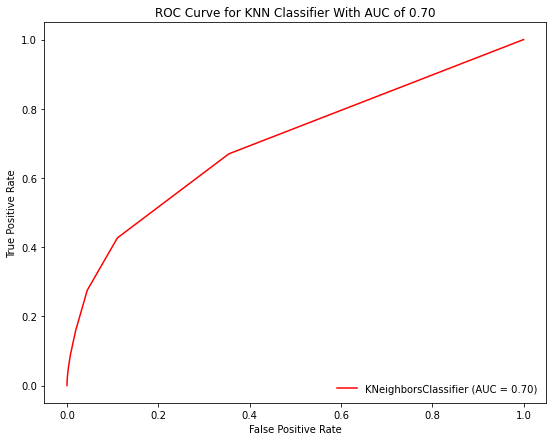

In [10]:
# Selecting the Best_Estimator From The Grid Search Result

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10,weights='uniform').fit(X_train,y_train)

#Probability of test Set
y_score = knn.predict_proba(X_test)

#Plotting ROC Curve
plt.figure(figsize=(9,7))
ax=plt.gca()
plot_roc_curve(knn, X_test, y_test,ax=ax,color='r');
plt.title('ROC Curve for KNN Classifier With AUC of {:.2f}'.format(roc_auc_score(y_test,y_score[:,1])));
plt.legend(frameon=False,loc=4)

#Getting Accuracy for comparision

print('\nAccuracy Gained by KNN Classifier on train set {:.3f}\n'.format(knn.score(X_train,y_train)))
print('Accuracy Gained by KNN Classifier on test set {:.3f}\n'.format(knn.score(X_test,y_test)))

In [11]:
#KNNClassifier reached accuracy of 93% and AUC of 0.7

### 2. Logistic Regression


Accuracy Gained by Logistic Regression on train set 0.935

Accuracy Gained by Logistic Regression on test set0.936



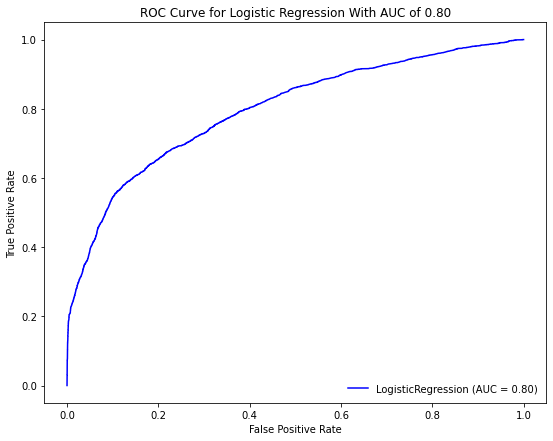

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve,roc_auc_score
lgr = LogisticRegression(max_iter=1000).fit(X_train,y_train) #Using Standard Values of general Parameters

#Probability of test Set
y_score = lgr.predict_proba(X_test)

#Plotting ROC Curve
plt.figure(figsize=(9,7))
ax=plt.gca()
plot_roc_curve(lgr, X_test, y_test,ax=ax,color='b');
plt.title('ROC Curve for Logistic Regression With AUC of {:.2f}'.format(roc_auc_score(y_test,y_score[:,1])));
plt.legend(frameon=False,loc=4)

#Getting Accuracy for comparision

print('\nAccuracy Gained by Logistic Regression on train set {:.3f}\n'.format(lgr.score(X_train,y_train)))
print('Accuracy Gained by Logistic Regression on test set{:.3f}\n'.format(lgr.score(X_test,y_test)))

### HyperParameter Tuning

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=1000)

#Parameters
param = {'C':(0.1,1,10,50,100),'class_weight':({0:0.1,1:0.9},{0:0.2,1:0.8},{0:0.3,1:0.7})}

clf = GridSearchCV(lgr, param,scoring='roc_auc',cv=3) #Grid Search with 3 fold Validation
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': (0.1, 1, 10, 50, 100),
                         'class_weight': ({0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8},
                                          {0: 0.3, 1: 0.7})},
             scoring='roc_auc')

In [14]:
df = pd.DataFrame(data=clf.cv_results_)
df = df.iloc[:,4:].drop(['std_test_score'],axis=1).set_index('rank_test_score').sort_values('mean_test_score',ascending=False)
df

,param_C,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score
rank_test_score,,,,,,,
1,100,"{0: 0.3, 1: 0.7}","{'C': 100, 'class_weight': {0: 0.3, 1: 0.7}}",0.798222,0.793295,0.788818,0.793445
2,10,"{0: 0.1, 1: 0.9}","{'C': 10, 'class_weight': {0: 0.1, 1: 0.9}}",0.798268,0.792983,0.788158,0.793137
3,50,"{0: 0.3, 1: 0.7}","{'C': 50, 'class_weight': {0: 0.3, 1: 0.7}}",0.797714,0.791661,0.789895,0.793090
4,50,"{0: 0.2, 1: 0.8}","{'C': 50, 'class_weight': {0: 0.2, 1: 0.8}}",0.796635,0.793048,0.788104,0.792596
5,50,"{0: 0.1, 1: 0.9}","{'C': 50, 'class_weight': {0: 0.1, 1: 0.9}}",0.797058,0.793153,0.786649,0.792287
6,10,"{0: 0.3, 1: 0.7}","{'C': 10, 'class_weight': {0: 0.3, 1: 0.7}}",0.797118,0.791965,0.787499,0.792194
7,1,"{0: 0.3, 1: 0.7}","{'C': 1, 'class_weight': {0: 0.3, 1: 0.7}}",0.796610,0.791827,0.787292,0.791910
8,1,"{0: 0.2, 1: 0.8}","{'C': 1, 'class_weight': {0: 0.2, 1: 0.8}}",0.793855,0.791924,0.786602,0.790794
9,100,"{0: 0.2, 1: 0.8}","{'C': 100, 'class_weight': {0: 0.2, 1: 0.8}}",0.797354,0.783839,0.789546,0.790246



Accuracy Gained by Logistic Regression on train set 0.932

Accuracy Gained by Logistic Regression on test set 0.933



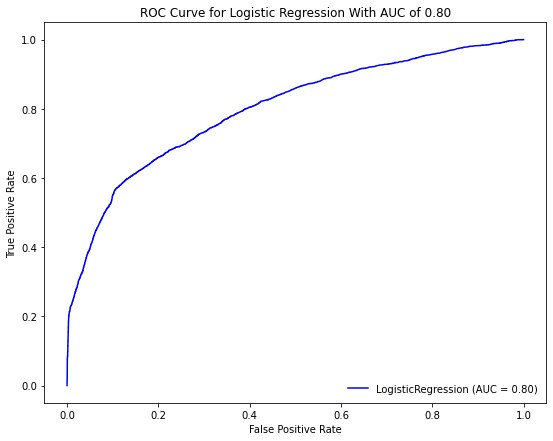

In [15]:
# Selecting the Best_Estimator From The Grid Search Result

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(C=100,class_weight={0:0.3,1:0.7},max_iter=1000).fit(X_train,y_train)

#Probability of test Set
y_score = lgr.predict_proba(X_test)

#Plotting ROC Curve
plt.figure(figsize=(9,7))
ax=plt.gca()
plot_roc_curve(lgr, X_test, y_test,ax=ax,color='b');
plt.title('ROC Curve for Logistic Regression With AUC of {:.2f}'.format(roc_auc_score(y_test,y_score[:,1])));
plt.legend(frameon=False,loc=4)

#Getting Accuracy for comparision

print('\nAccuracy Gained by Logistic Regression on train set {:.3f}\n'.format(lgr.score(X_train,y_train)))
print('Accuracy Gained by Logistic Regression on test set {:.3f}\n'.format(lgr.score(X_test,y_test)))

In [16]:
# Accuracy has not change between Logistic Regression and Logistic Regression, its still 93%
#but Logistic Regression's AUC has spiked to 0.80 which is already a lot better from dummy classifier & KNN Classifier

### 3. Decision Tree


Accuracy Gained Decision Tree on train set 0.973

Accuracy Gained Decision Tree on test set 0.922



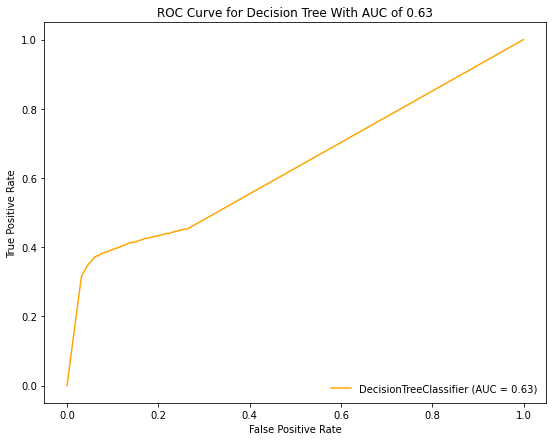

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train,y_train) #Using Default Parameters

#Probability of test Set
y_score = dtc.predict_proba(X_test)

#Plotting ROC Curve
plt.figure(figsize=(9,7))
ax=plt.gca()
plot_roc_curve(dtc, X_test, y_test,ax=ax,color='orange');
plt.title('ROC Curve for Decision Tree With AUC of {:.2f}'.format(roc_auc_score(y_test,y_score[:,1])));
plt.legend(frameon=False,loc=4)

#Getting Accuracy for comparision

print('\nAccuracy Gained Decision Tree on train set {:.3f}\n'.format(dtc.score(X_train,y_train)))
print('Accuracy Gained Decision Tree on test set {:.3f}\n'.format(dtc.score(X_test,y_test)))

### HyperParameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

#Parameters
param = {'max_depth':(5,7,10),'min_samples_leaf':(3,5,8),'max_leaf_nodes':(3,5)}

clf = GridSearchCV(dtc, param,scoring='roc_auc',cv=3) #Grid Search with 3 fold Validation
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': (5, 7, 10), 'max_leaf_nodes': (3, 5),
                         'min_samples_leaf': (3, 5, 8)},
             scoring='roc_auc')

In [19]:
df = pd.DataFrame(data=clf.cv_results_)
df = df.iloc[:,4:].drop(['std_test_score'],axis=1).set_index('rank_test_score').sort_values('mean_test_score',ascending=False)
df.iloc[:7,:]

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score
rank_test_score,,,,,,,,
1,7,5,3,"{'max_depth': 7, 'max_leaf_nodes': 5, 'min_sam...",0.754616,0.752738,0.745831,0.751062
1,7,5,5,"{'max_depth': 7, 'max_leaf_nodes': 5, 'min_sam...",0.754616,0.752738,0.745831,0.751062
1,10,5,5,"{'max_depth': 10, 'max_leaf_nodes': 5, 'min_sa...",0.754616,0.752738,0.745831,0.751062
1,10,5,3,"{'max_depth': 10, 'max_leaf_nodes': 5, 'min_sa...",0.754616,0.752738,0.745831,0.751062
1,7,5,8,"{'max_depth': 7, 'max_leaf_nodes': 5, 'min_sam...",0.754616,0.752738,0.745831,0.751062
1,10,5,8,"{'max_depth': 10, 'max_leaf_nodes': 5, 'min_sa...",0.754616,0.752738,0.745831,0.751062
1,5,5,8,"{'max_depth': 5, 'max_leaf_nodes': 5, 'min_sam...",0.754616,0.752738,0.745831,0.751062



Accuracy Gained by Decision Tree on train set 0.944

Accuracy Gained by Decision Tree on test set 0.945



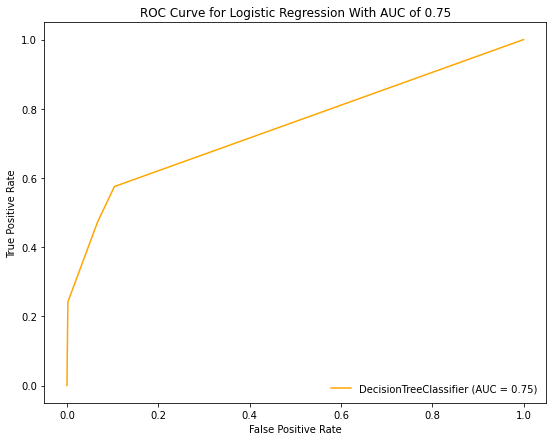

In [20]:
# Selecting the Best_Estimator From The Grid Search Result

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=7,max_leaf_nodes=5,min_samples_leaf=3).fit(X_train,y_train)

#Probability of test Set
y_score = dtc.predict_proba(X_test)

#Plotting ROC Curve
plt.figure(figsize=(9,7))
ax=plt.gca()
plot_roc_curve(dtc, X_test, y_test,ax=ax,color='orange');
plt.title('ROC Curve for Logistic Regression With AUC of {:.2f}'.format(roc_auc_score(y_test,y_score[:,1])));
plt.legend(frameon=False,loc=4)

#Getting Accuracy for comparision

print('\nAccuracy Gained by Decision Tree on train set {:.3f}\n'.format(dtc.score(X_train,y_train)))
print('Accuracy Gained by Decision Tree on test set {:.3f}\n'.format(dtc.score(X_test,y_test)))

In [21]:
# The Best Decision Tree Was able to improve the AUC upto 0.78

# Visualizing The Decision Tree

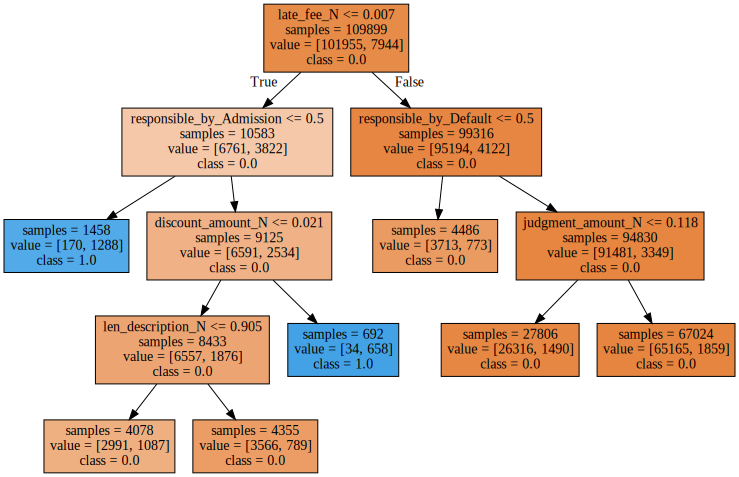

In [22]:
from Visualization_Utility import plot_decision_tree #Visualization Utility

#Plotting Decision Tree Visualization
plot_decision_tree(DecisionTreeClassifier(max_depth=5,max_leaf_nodes=7).fit(X_train,y_train),
                   [str(x) for x in X_train.columns.tolist()],[str(y) for y in y_train.unique()])

# Comparing AUC of Different Models

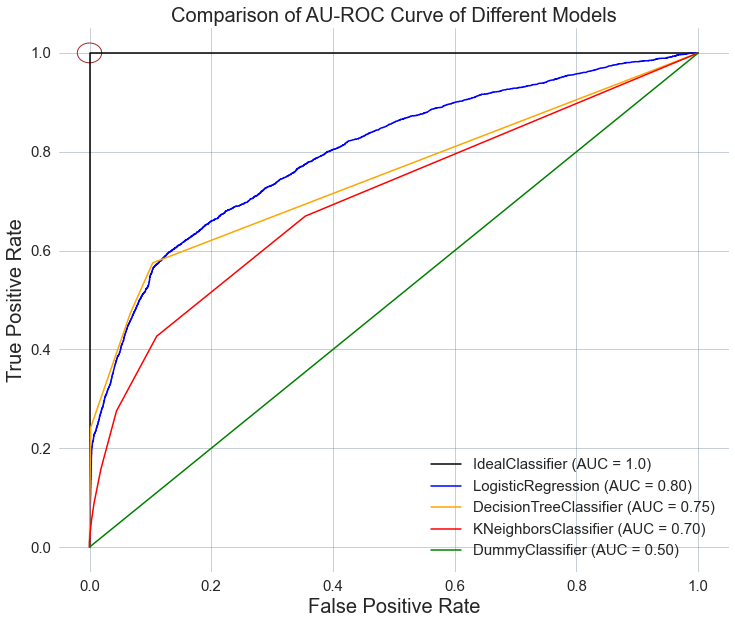

In [24]:
#Getting ideal Scores
from sklearn.metrics import roc_curve
fpr_id,tpr_id,_ = roc_curve(y_test,y_test)

#Setting The Canvas
import pylab as plot
plt.figure(figsize=(12,10))
ax=plt.gca()
params = {'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize':15,
         'ytick.labelsize':15}
plot.rcParams.update(params)
plt.style.use('seaborn-white')

#Plotting Ideal Classifier
plt.plot(fpr_id,tpr_id,color='k',label='IdealClassifier (AUC = 1.0)')
Ideal_Point = plt.Circle((0, 1), 0.02, color='brown', fill=False)
plt.gca().add_artist(Ideal_Point)

#Plotting Models
plot_roc_curve(lgr, X_test, y_test,ax=ax,color='blue');
plot_roc_curve(dtc, X_test, y_test,ax=ax,color='orange');
plot_roc_curve(knn, X_test, y_test,ax=ax,color='r');
plot_roc_curve(dum1, X_test, y_test,ax=ax,color='green');

#Adjusting Layout
for sp in plt.gca().spines.values():
    sp.set_visible(False)

plt.grid(color='lightslategrey',which='both',alpha=0.5)
plt.legend(loc=4,frameon=False,fontsize=15);
plt.gca().tick_params(axis='both', which='major', pad=8);
plt.title('Comparison of AU-ROC Curve of Different Models');

#Saving Visualization
plt.savefig('Model_Comparison.png')